# Który klient linii lotniczych jest zadowolony?
### Praca w ramach przedmiotu Eksploracja danych - przygotowanie danych do modelu ML

# Przedstawienie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('airlines.csv', sep=';')
df.head(10)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,no_pass,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,31.12.2018,115.0,123.0,Clean,Neutral,1
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,31.12.2018,135.0,177.0,Clean,Very safe,1
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,31.12.2018,70.0,282.0,Average,Somewhat safe,0
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,31.12.2018,190.0,126.0,Clean,Very safe,1
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,31.12.2018,559.0,142.0,Somewhat clean,Very safe,1
5,5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,31.12.2018,140.0,193.0,Somewhat clean,Very safe,1
6,6,2578,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,31.12.2018,63.0,256.0,Clean,Very safe,1
7,8,2592,Saturday,AEROMEXICO,MEXICO CITY,Canada/Mexico,Hub,Gates 1-12,31.12.2018,215.0,156.0,Somewhat clean,Very safe,0
8,9,919,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,31.12.2018,70.0,141.0,Somewhat clean,Somewhat safe,1
9,10,3028,Tuesday,UNITED,PORTLAND,West US,Medium,Gates 70-90,31.12.2018,180.0,198.0,Average,Very safe,0


Zmienną celu jest satisfaction. Około 79% klientów jest zadowolonych ze swojego lotu.

In [3]:
df.describe()

,Unnamed: 0,id,wait_min,no_pass,satisfaction
count,2477.000000,2477.000000,2150.000000,2473.000000,2477.000000
mean,1411.785224,1813.363746,166.534865,200.585524,0.785224
std,815.300508,945.226305,107.052209,57.973128,0.410750
min,0.000000,1.000000,15.000000,100.000000,0.000000
25%,709.000000,1038.000000,105.000000,150.000000,1.000000
50%,1414.000000,1859.000000,145.000000,201.000000,1.000000
75%,2122.000000,2581.000000,190.000000,252.000000,1.000000
max,2808.000000,9004.000000,1210.000000,300.000000,1.000000


Widzimy, że niektóry kolumny zawierają brakujące wartości, którymi zajmiemy się wkrótce.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2477 non-null   int64  
 1   id             2477 non-null   int64  
 2   day            2477 non-null   object 
 3   airline        2477 non-null   object 
 4   destination    2477 non-null   object 
 5   dest_region    2477 non-null   object 
 6   dest_size      2477 non-null   object 
 7   boarding_area  2477 non-null   object 
 8   dept_time      2477 non-null   object 
 9   wait_min       2150 non-null   float64
 10  no_pass        2473 non-null   float64
 11  cleanliness    2477 non-null   object 
 12  safety         2477 non-null   object 
 13  satisfaction   2477 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 271.0+ KB


In [5]:
# Tworzymy zmienną celu

y = df.satisfaction
X = df.drop('satisfaction', axis=1)

In [6]:
X.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,no_pass,cleanliness,safety
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,31.12.2018,115.0,123.0,Clean,Neutral
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,31.12.2018,135.0,177.0,Clean,Very safe
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,31.12.2018,70.0,282.0,Average,Somewhat safe
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,31.12.2018,190.0,126.0,Clean,Very safe
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,31.12.2018,559.0,142.0,Somewhat clean,Very safe


In [7]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

# Czyszczenie danych
Każde id jest inne, a dept_time ma tylko dwie wartości (z czego 1 stycznia stanowi jakiś 1% datasetu), więc pozbywam się obydwu kolumn z datasetu. Nie będą one miały znaczącego wpływu przy użyciu modelu ML. Podobnie usuwam też zaśmiecającą kolumnę Unnamed: 0.

In [8]:
X['id'].value_counts()

1351    1
909     1
826     1
2657    1
2781    1
       ..
2955    1
1803    1
1231    1
2256    1
2162    1
Name: id, Length: 2477, dtype: int64

In [9]:
X['dept_time'].value_counts()

31.12.2018    2440
01.01.2018      37
Name: dept_time, dtype: int64

In [10]:
X.drop(['id'],axis=1,inplace=True)
X.drop(['dept_time'],axis=1,inplace=True)
X.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
X.head(20)

,day,airline,destination,dest_region,dest_size,boarding_area,wait_min,no_pass,cleanliness,safety
0,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,115.0,123.0,Clean,Neutral
1,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,135.0,177.0,Clean,Very safe
2,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,70.0,282.0,Average,Somewhat safe
3,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,190.0,126.0,Clean,Very safe
4,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,559.0,142.0,Somewhat clean,Very safe
5,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,140.0,193.0,Somewhat clean,Very safe
6,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,63.0,256.0,Clean,Very safe
7,Saturday,AEROMEXICO,MEXICO CITY,Canada/Mexico,Hub,Gates 1-12,215.0,156.0,Somewhat clean,Very safe
8,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,70.0,141.0,Somewhat clean,Somewhat safe
9,Tuesday,UNITED,PORTLAND,West US,Medium,Gates 70-90,180.0,198.0,Average,Very safe


Niektóre kolumny mogą wymagać czyszczenia (widać np. pewne niespójności w dest_region).

In [12]:
def unique_and_counts(df,column):
    print(df[column].unique())
    print('')
    print(df[column].value_counts())  

In [13]:
unique_and_counts(X,'dest_region')# Pozbywamy się niespójności

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']

West US                  864
East US                  367
Europe                   272
Midwest US               251
Asia                     226
Canada/Mexico            198
eur                       79
EAST US                   69
Australia/New Zealand     60
Middle East               48
Central/South America     22
middle east               21
Name: dest_region, dtype: int64


In [14]:
X['dest_region'].replace(['EAST US','eur','middle east'],['East US','Europe','Middle East'],inplace=True)
unique_and_counts(X,'dest_region') #Teraz wygląda w porządku

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'Middle East'
 'Europe' 'Central/South America' 'Australia/New Zealand']

West US                  864
East US                  436
Europe                   351
Midwest US               251
Asia                     226
Canada/Mexico            198
Middle East               69
Australia/New Zealand     60
Central/South America     22
Name: dest_region, dtype: int64


dest_size również wymaga obróbki

In [15]:
unique_and_counts(X,'dest_size')

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']

Hub            1202
Medium          457
    Hub         226
Small           165
Hub             122
Large           110
    Medium       97
Medium           46
    Small        20
Small            15
    Large        11
Large             6
Name: dest_size, dtype: int64


In [16]:
X['dest_size'] = X['dest_size'].str.strip()
unique_and_counts(X,'dest_size')

['Hub' 'Small' 'Medium' 'Large']

Hub       1550
Medium     600
Small      200
Large      127
Name: dest_size, dtype: int64


In [17]:
unique_and_counts(X,'day')

['Tuesday' 'Friday' 'Thursday' 'Wednesday' 'Saturday' 'Sunday' 'Monday']

Tuesday      535
Wednesday    518
Thursday     488
Friday       368
Sunday       267
Saturday     210
Monday        91
Name: day, dtype: int64


In [18]:
unique_and_counts(X,'airline')

['UNITED INTL' 'ALASKA' 'DELTA' 'SOUTHWEST' 'AMERICAN' 'JETBLUE'
 'AEROMEXICO' 'AIR CANADA' 'UNITED' 'INTERJET' 'TURKISH AIRLINES'
 'AIR FRANCE/KLM' 'HAWAIIAN AIR' 'COPA' 'WOW' 'KOREAN AIR' 'EMIRATES'
 'AVIANCA' 'AER LINGUS' 'CATHAY PACIFIC' 'BRITISH AIRWAYS'
 'PHILIPPINE AIRLINES' 'LUFTHANSA' 'QANTAS' 'FRONTIER' 'CHINA EASTERN'
 'EVA AIR' 'VIRGIN ATLANTIC' 'AIR NEW ZEALAND' 'SINGAPORE AIRLINES'
 'AIR CHINA' 'CHINA SOUTHERN' 'ANA ALL NIPPON']

UNITED                 526
ALASKA                 315
SOUTHWEST              184
AMERICAN               175
DELTA                  170
UNITED INTL            155
JETBLUE                144
AIR CANADA             133
AIR FRANCE/KLM         120
CATHAY PACIFIC          81
LUFTHANSA               64
FRONTIER                41
EMIRATES                39
WOW                     38
VIRGIN ATLANTIC         32
TURKISH AIRLINES        30
QANTAS                  28
AIR NEW ZEALAND         21
BRITISH AIRWAYS         21
INTERJET                18
AER LINGUS  

<AxesSubplot:xlabel='count', ylabel='airline'>

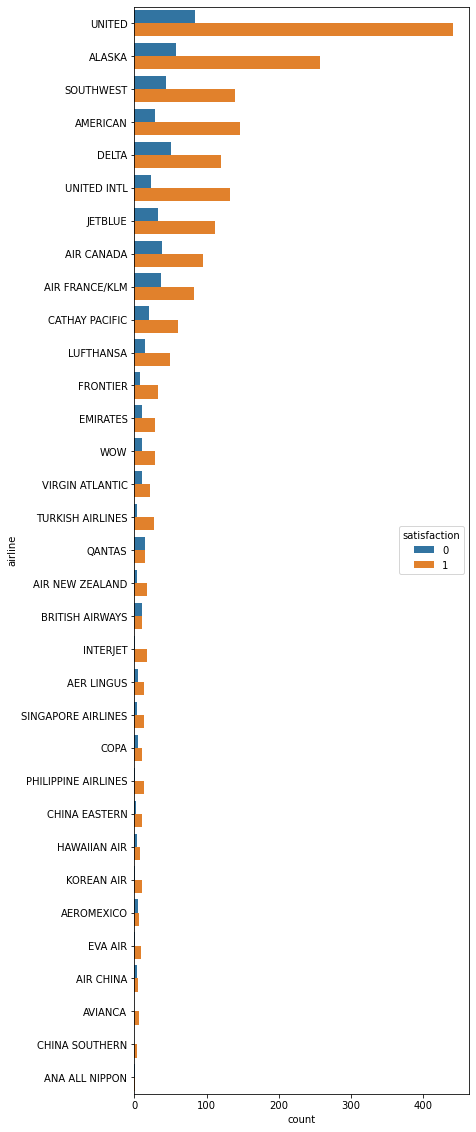

In [19]:
plt.figure(figsize=(6,20))
sns.countplot(data=X,y='airline',order = X['airline'].value_counts().index,hue=y)

Nie widzę dużej zależności między częstością korzystania z konkretnej linii lotniczej a satysfakcją, więc tworzę bucket 'Other', aby zmniejszyć liczbę kategorii.

In [20]:
X['airline'] = [x if X['airline'].value_counts()[x] > 25 else 'Other' for x in X['airline']]
X['airline'].value_counts()

UNITED              526
ALASKA              315
Other               202
SOUTHWEST           184
AMERICAN            175
DELTA               170
UNITED INTL         155
JETBLUE             144
AIR CANADA          133
AIR FRANCE/KLM      120
CATHAY PACIFIC       81
LUFTHANSA            64
FRONTIER             41
EMIRATES             39
WOW                  38
VIRGIN ATLANTIC      32
TURKISH AIRLINES     30
QANTAS               28
Name: airline, dtype: int64

In [21]:
unique_and_counts(X,'destination')

['KANSAI' 'SAN JOSE DEL CABO' 'LOS ANGELES' 'MIAMI' 'NEWARK' 'LONG BEACH'
 'MEXICO CITY' 'TORONTO' 'PORTLAND' 'SAN DIEGO' 'BOSTON' 'SPOKANE'
 'GUADALAJARA' 'MINNEAPOLIS-ST. PAUL' 'NEW YORK-JFK' 'ISTANBUL'
 'BALTIMORE' 'LAS VEGAS' 'SHANGHAI' 'TOKYO-NARITA' 'PARIS-DE GAULLE'
 'HONOLULU' 'DALLAS-FT. WORTH' 'PANAMA CITY' 'PHOENIX' 'REYKJAVIK'
 'SAN ANTONIO' 'HONG KONG' 'SEOUL' 'DUBAI' "CHICAGO-O'HARE" 'INDIANAPOLIS'
 'SAN SALVADOR' 'SALT LAKE CITY' 'BEIJING' 'DUBLIN' 'WASHINGTON DC-DULLES'
 'LONDON HEATHROW' 'MANILA' 'RALEIGH-DURHAM' 'VANCOUVER' 'MUNICH'
 'NEW ORLEANS' 'FRANKFURT' 'SYDNEY' 'KAHULUI' 'AMSTERDAM' 'ATLANTA'
 'SEATTLE' 'DETROIT' 'SANTA BARBARA' 'PHILADELPHIA' 'DENVER' 'BAKERSFIELD'
 'AUSTIN' 'CALGARY' 'TAIPEI' 'ONTARIO (CALIF)' 'BURBANK' 'CHARLOTTE'
 'AUCKLAND' 'SINGAPORE' 'ORLANDO' 'NASHVILLE' 'WUHAN' 'HOUSTON-BUSH'
 'FT. LAUDERDALE' 'SANTA ANA' 'EUGENE' 'KANSAS CITY' 'QINGDAO'
 'PUERTO VALLARTA']

LOS ANGELES        185
PARIS-DE GAULLE    126
DENVER              96
HONG KONG

<AxesSubplot:xlabel='count', ylabel='destination'>

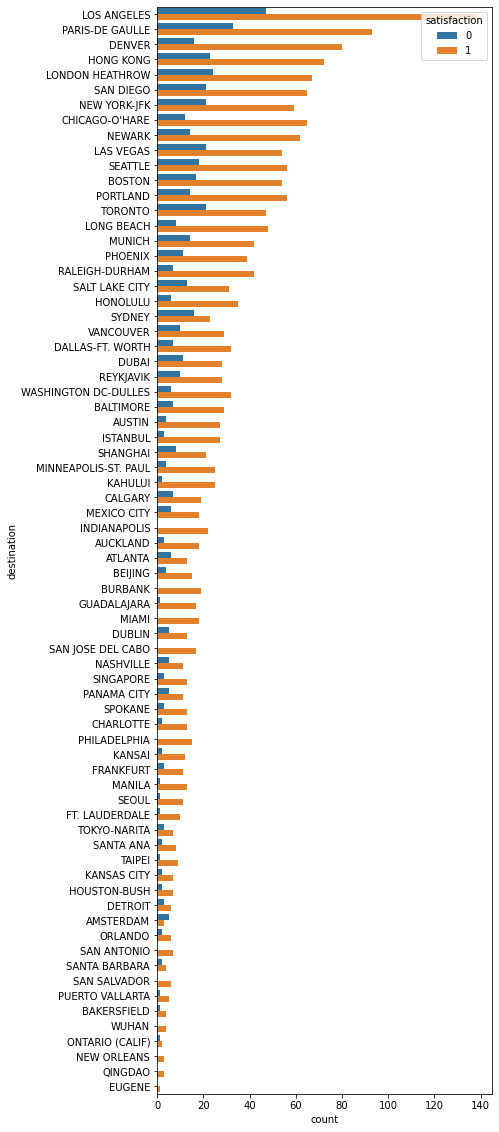

In [22]:
plt.figure(figsize=(6,20))
sns.countplot(data=X,y='destination',order = X['destination'].value_counts().index,hue=y)

Podobnie tutaj tworzę bucket Other dla rzadkich wystąpień.

In [23]:
X['destination'] = [x if X['destination'].value_counts()[x] > 10 else 'Other' for x in X['destination']]
X['destination'].value_counts()

LOS ANGELES             185
PARIS-DE GAULLE         126
Other                   117
DENVER                   96
HONG KONG                95
LONDON HEATHROW          91
SAN DIEGO                86
NEW YORK-JFK             80
CHICAGO-O'HARE           77
NEWARK                   76
LAS VEGAS                75
SEATTLE                  74
BOSTON                   71
PORTLAND                 70
TORONTO                  68
LONG BEACH               56
MUNICH                   56
PHOENIX                  50
RALEIGH-DURHAM           49
SALT LAKE CITY           44
HONOLULU                 41
VANCOUVER                39
SYDNEY                   39
DUBAI                    39
DALLAS-FT. WORTH         39
REYKJAVIK                38
WASHINGTON DC-DULLES     38
BALTIMORE                36
AUSTIN                   31
ISTANBUL                 30
MINNEAPOLIS-ST. PAUL     29
SHANGHAI                 29
KAHULUI                  27
CALGARY                  26
MEXICO CITY              24
INDIANAPOLIS        

In [24]:
unique_and_counts(X,'boarding_area')

['Gates 91-102' 'Gates 50-59' 'Gates 40-48' 'Gates 20-39' 'Gates 1-12'
 'Gates 70-90' 'Gates 60-69']

Gates 1-12      609
Gates 91-102    474
Gates 50-59     467
Gates 70-90     383
Gates 20-39     225
Gates 40-48     176
Gates 60-69     143
Name: boarding_area, dtype: int64


In [25]:
unique_and_counts(X,'cleanliness')

['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty']

Somewhat clean    1175
Clean              885
Average            389
Somewhat dirty      26
Dirty                2
Name: cleanliness, dtype: int64


Czystość ma bardzo duże znaczenie dla satysfakcji klienta.

<AxesSubplot:xlabel='count', ylabel='cleanliness'>

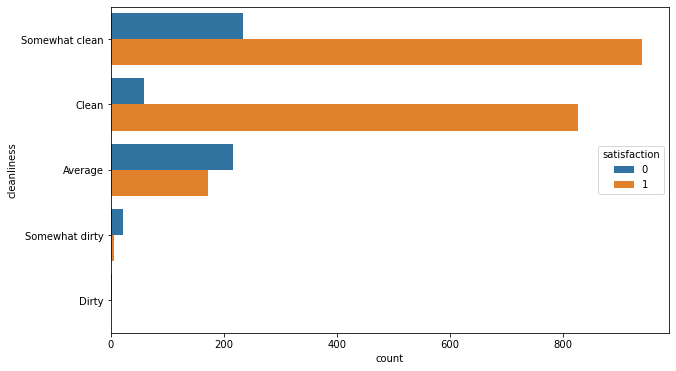

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=X,y='cleanliness',order = X['cleanliness'].value_counts().index,hue=y)

In [27]:
unique_and_counts(X,'safety')

['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe']

Very safe          1296
Somewhat safe       864
Neutral             303
Very unsafe           8
Somewhat unsafe       6
Name: safety, dtype: int64


Również bezpieczeństwo ma duży wpływ na satysfakcję.

<AxesSubplot:xlabel='count', ylabel='safety'>

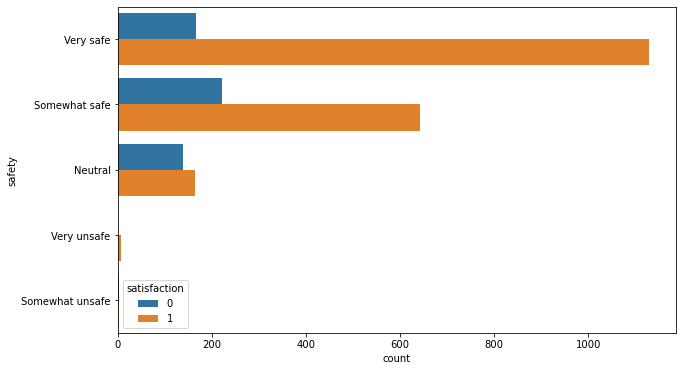

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=X,y='safety',order = X['safety'].value_counts().index,hue=y)

#### Widać delikatne przesunięcie - im więcej pasażerów, tym większa szansa na brak satysfakcji

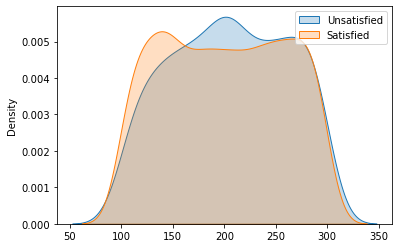

In [29]:
sns.kdeplot(x=list(X['no_pass'][y==0]),label='Unsatisfied',shade=True)
sns.kdeplot(x=list(X['no_pass'][y==1]),label='Satisfied',shade=True)
plt.legend()

#### Tutaj aż takiej różnicy nie widać (czas oczekiwania w bramce)

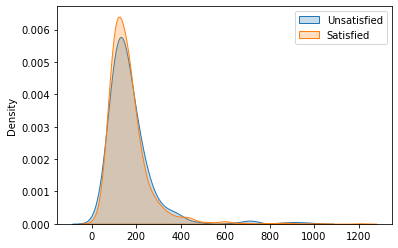

In [30]:
sns.kdeplot(x=list(X['wait_min'][y==0]),label='Unsatisfied',shade=True)
sns.kdeplot(x=list(X['wait_min'][y==1]),label='Satisfied',shade=True)
plt.legend()

### Dummizuję zmienne kategoryczne

In [31]:
# Tworzymy listę zmiennych do zdummizowania
to_dummy = ['day','airline','destination','dest_region','dest_size','boarding_area','cleanliness','safety']

# Zamieniamy kolumny kategoryczne na zdummizowane
def dummy_df(df, to_dummy):
    for x in to_dummy:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

# Wywołujemy tę funkcję wyżej
X = dummy_df(X, to_dummy)

In [32]:
X.head(5) # Chyba gitarson

,wait_min,no_pass,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,airline_AIR CANADA,...,cleanliness_Average,cleanliness_Clean,cleanliness_Dirty,cleanliness_Somewhat clean,cleanliness_Somewhat dirty,safety_Neutral,safety_Somewhat safe,safety_Somewhat unsafe,safety_Very safe,safety_Very unsafe
0,115.0,123.0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,135.0,177.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,70.0,282.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,190.0,126.0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,559.0,142.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Teraz zajmiejmy się brakującymi wartościami

In [33]:
X.isnull().sum() #Wygląda na to, że tylko dwie kategorie mają brakujące wartości

wait_min                  327
no_pass                     4
day_Friday                  0
day_Monday                  0
day_Saturday                0
                         ... 
safety_Neutral              0
safety_Somewhat safe        0
safety_Somewhat unsafe      0
safety_Very safe            0
safety_Very unsafe          0
Length: 112, dtype: int64

#### Brakujące no_pass (number of passengers) to zaledwie promil całego datasetu, a brakujące wait_min to ponad 10%.
Decyduję się na uzupełnienie w obydwu przypadkach brakujących wartości medianami, są bowiem odporne na ewentualne odstające wartości - takie jak 1210 minut czekania w bramce.

In [34]:
X['no_pass'].describe()

count    2473.000000
mean      200.585524
std        57.973128
min       100.000000
25%       150.000000
50%       201.000000
75%       252.000000
max       300.000000
Name: no_pass, dtype: float64

In [35]:
X['no_pass'].fillna(X['no_pass'].median(),inplace=True)

In [36]:
X['wait_min'].describe()

count    2150.000000
mean      166.534865
std       107.052209
min        15.000000
25%       105.000000
50%       145.000000
75%       190.000000
max      1210.000000
Name: wait_min, dtype: float64

In [37]:
X['wait_min'].fillna(X['wait_min'].median(),inplace=True)

In [38]:
X.isnull().sum() # Pozbyliśmy się brakujących wartości niniejszym.

wait_min                  0
no_pass                   0
day_Friday                0
day_Monday                0
day_Saturday              0
                         ..
safety_Neutral            0
safety_Somewhat safe      0
safety_Somewhat unsafe    0
safety_Very safe          0
safety_Very unsafe        0
Length: 112, dtype: int64

### Wartości odstające

<AxesSubplot:>

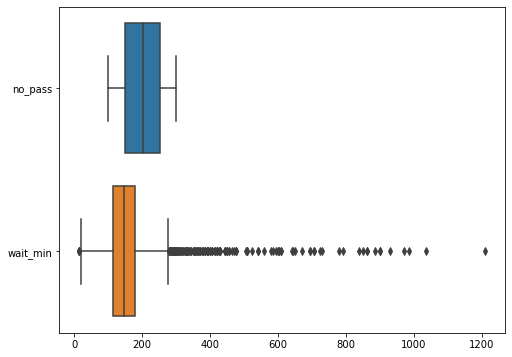

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(data=X[['no_pass','wait_min']],orient='h')

Jak widać, tylko wait_min ma jakieś wartości odstające.
Kwestia błędu w danych nie wydaje mi się wystarczająco prawdopodobna (opóźnienia lotnicze sięgające kilkunastu godzin są możliwością, mimo że rzadką), więc decyduję się zostawić outliery.

### Podział na train/test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [52]:
X_train.shape

(1981, 112)

In [53]:
X_test.shape

(496, 112)